# Lab 5: Decision Tree

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **4BSc DS A** <br>

---------------

### `Objective`:  

**Part A**: Create a Class named DecisionTree for implementing Binary Classification Problems, based on Gini Impurity Loss Function. While initialising, these should be another parameter named as maxDepth for restricting the growth of the tree beyond a certain height.The methods should be - train() [trains a model based on Gini Impurity] and test() [returns predicted values for input variables].  
<br>
**Part B**: Import the sklearn.tree.DecisionTreeClassifier, and perform classification on the Titanic Dataset.  
<br>
**Part C**: Compare your results with Dummy Classifier with the following parameters - most_frequent, prior, uniform, constant, and comment on the results.

### `Probelm Definition`:  
Either create a class for Decision Tree working on the principle of Gini coefficient or use the sklearn function and illustrate the use of evaluation metrics.

### `Observations`:  
It is observed that the DummyClassifier gives out higher accuracy overall than the DecisionTreeClassifier in all of it's parameters.

### `References`:  
1. Scikit API
2. StackOverflow
3. GeekforGeeks
4. TutorialsPoint
5. Medium
6. W3School  
7. AnderFernandez.com

### `Code`:

In [33]:
# importing all the necessary libraries / modules
import pandas as pd
import numpy as np
import pickle
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as tr
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### Part B

In [14]:
# Importing datasets onto python
df_train = pd.read_csv("D:/Z/Downloads/train.csv")
df_test = pd.read_csv("D:/Z/Downloads/titanic_sample.csv")

In [15]:
# Dropping the categorical columns
df_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [16]:
# Label Encoding the Embark and Gender columns
gender_le1 = LabelEncoder()
gender_le2 = LabelEncoder()
df_train['Sex'] = gender_le1.fit_transform(df_train['Sex'])
df_test['Sex'] = gender_le2.fit_transform(df_test['Sex'])

embarked_le1 = LabelEncoder()
embarked_le2 = LabelEncoder()
df_train['Embarked'] = embarked_le1.fit_transform(df_train['Embarked'])
df_test['Embarked'] = embarked_le2.fit_transform(df_test['Embarked'])

In [17]:
# Dealing with NA values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [18]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            60
SibSp           0
Parch           0
Fare            0
Embarked        0
Survived        0
dtype: int64

In [27]:
# Replacing NaN values with mean of the column
df_train['Age'].replace(np.nan, df_train['Age'].mean(), inplace = True)
df_test['Age'].replace(np.nan, df_test['Age'].mean(), inplace = True)
df_test['Fare'].replace(np.nan, df_test['Fare'].mean(), inplace = True)

In [37]:
# Splitting Data into X_train, X_test, y_train, y_test
X_train, X_test = df_train[list(df_train.columns)[:-1]], df_test[list(df_test.columns)[:-1]]
y_train, y_test = df_train[['Survived']], df_test[['Survived']]

In [49]:
# Creating a user-defined function to train a Decision Tree Model
def decisionTreeAlgo(X_train, y_train, X_test, criteria): # Criteria in this case can be either entropy or gini
    tree = DecisionTreeClassifier(criterion = criteria, random_state = 40)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    plt.figure(figsize=(12,8)) # plotting the decision tree
    t = tr.plot_tree(tree.fit(X_train, y_train))
    accuracy = tree.score(X_test, y_test)
    
    return t, ("Accuracy:", accuracy) # returning the decision tree diagram and the accuracy of the model

([Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
  Text(0.25, 0.25, 'gini = 0.0\nsamples = 549\nvalue = [549, 0]'),
  Text(0.75, 0.25, 'gini = 0.0\nsamples = 342\nvalue = [0, 342]')],
 ('Accuracy:', 0.4))

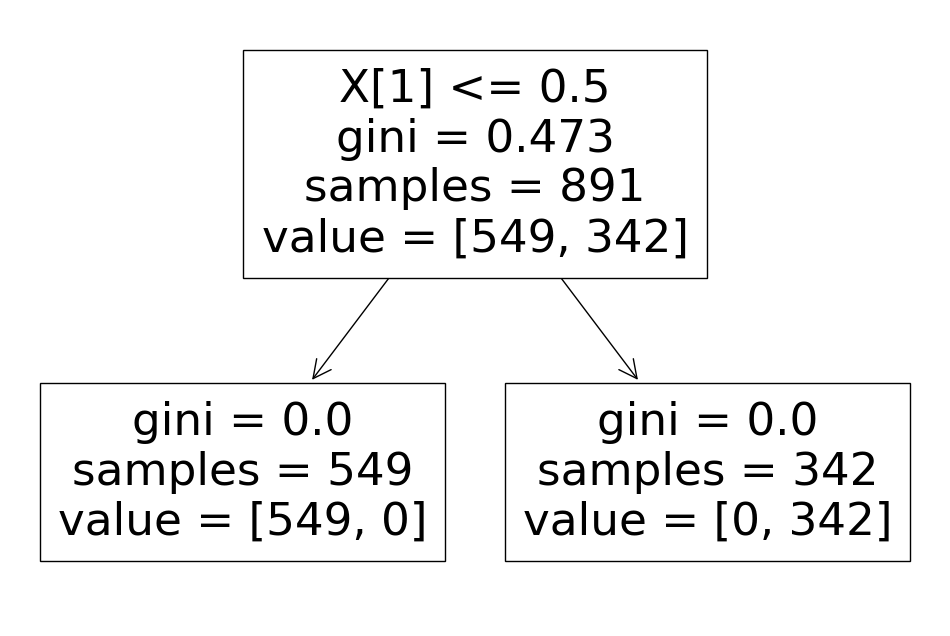

In [50]:
decisionTreeAlgo(X_train, y_train, X_test, 'gini')

([Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
  Text(0.25, 0.25, 'entropy = 0.0\nsamples = 549\nvalue = [549, 0]'),
  Text(0.75, 0.25, 'entropy = 0.0\nsamples = 342\nvalue = [0, 342]')],
 ('Accuracy:', 0.4))

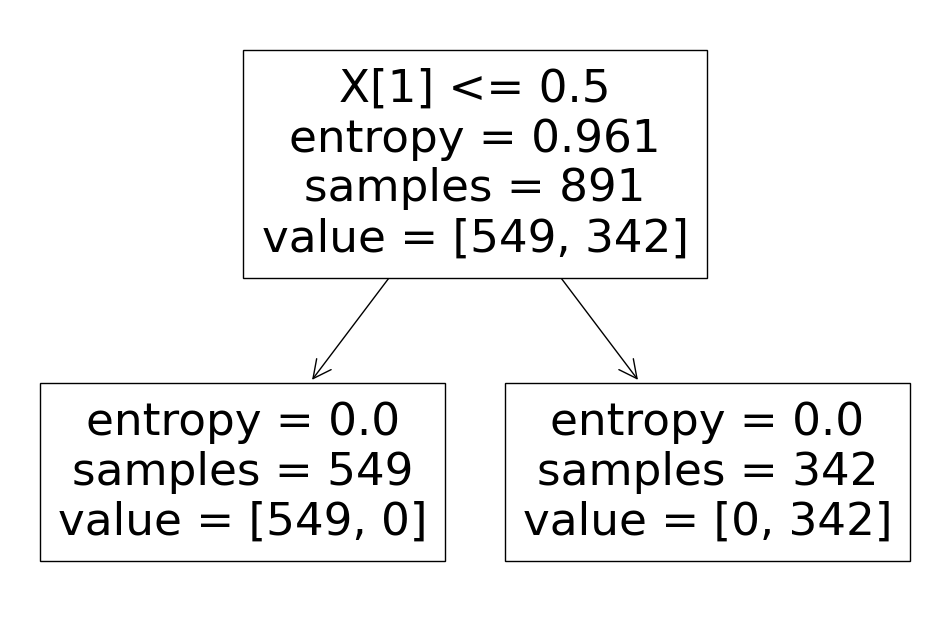

In [51]:
decisionTreeAlgo(X_train, y_train, X_test, 'entropy')

### Part C

In [55]:
parameters = ['most_frequent', 'prior', 'uniform']

for parameter in parameters:
    dummy = DummyClassifier(strategy = parameter)
    dummy.fit(X_train, y_train)
    score = dummy.score(X_test, y_test)
    print("Dummy Classifier | {}: {}".format(parameter, score))

Dummy Classifier | most_frequent: 0.6
Dummy Classifier | prior: 0.6
Dummy Classifier | uniform: 0.49666666666666665


### Part A

In [ ]:
class DecisionTreeClassifier:
    
    def __init__(self, )

In [56]:
def gini_impurity(y):
  if isinstance(y, pd.Series):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return(gini)

  else:
    raise('Object must be a Pandas Series.')

In [57]:
gini_impurity(df_train['Survived'])

0.4730129578614428

<hr>